<a href="https://colab.research.google.com/github/awjallow/CSC_447_ML_Notebooks/blob/main/Amadou_Jallow_AS03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [219]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [220]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
df.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class label']
display(df.head())

,Sepal length,Sepal width,Petal length,Petal width,Class label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [221]:
IA = df.iloc[:,:].values
Cl = IA[:,4]
IC = np.unique(IA[:,4])

print(IC)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


# Data Splitting

In [222]:
X = df[['Sepal length', 'Sepal width', 'Petal length', 'Petal width']].values
y = pd.factorize(df['Class label'])[0]
# display(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# display(X_train)

print('Training data points: {}'.format(X_train.shape[0]))
print('Testing data points: {}'.format(X_test.shape[0]))
print('Class labels: {} (mapped from {}'.format(np.unique(y), np.unique(df['Class label'])))

Training data points: 100
Testing data points: 50
Class labels: [0 1 2] (mapped from ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [223]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Adaline

In [224]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        The seed of the pseudo random number generator.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : array-like; shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like; shape = [n_samples]
            Target values or labels.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.activation(X)
            
            # Cost function
            error = (y - output)
            cost = (error**2).sum() / 2.0
            self.cost_.append(cost)
            
            # Update rule
            self.w_[1:] += self.eta * X.T.dot(error)
            self.w_[0] += self.eta * error.sum()
            
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

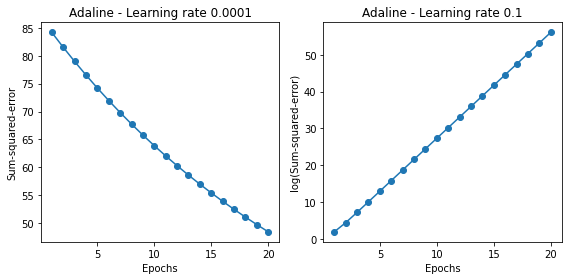

In [225]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ada1 = AdalineGD(n_iter=20, eta=0.0001).fit(X_train_std, y_train)
ax[0].plot(range(1, len(ada1.cost_) + 1), ada1.cost_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline - Learning rate 0.0001')

ada2 = AdalineGD(n_iter=20, eta=0.1).fit(X_train_std, y_train)
ax[1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.1')

plt.tight_layout()
plt.show()

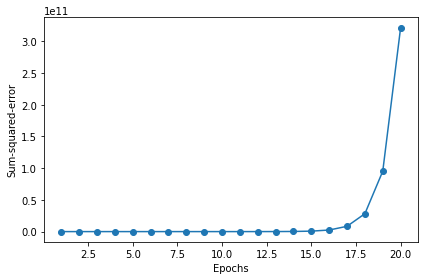

Accuracy: 0.04


In [226]:
ada = AdalineGD(n_iter=20, eta=0.01)
ada.fit(X_train_std, y_train)

# cost values

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
plt.show()

# testing accuracy

y_pred = ada.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

In [227]:
# Logistic Regression
logistic_reg = LogisticRegression()
logistic_reg.fit(X, y)
logistic_reg_score = logistic_reg.score(X, y)


# SVM Linear
svm_linear = SVC(kernel="linear")
svm_linear.fit(X, y)
svm_linear_score = svm_linear.score(X, y)


# SVM Polynomial
svm_poly = SVC(kernel="poly")
svm_poly.fit(X, y)
svm_poly_score = svm_poly.score(X, y)


# SVM RBF
svm_rbf = SVC(kernel="rbf")
svm_rbf.fit(X, y)
svm_rbf_score = svm_rbf.score(X, y)


# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X ,y)
decision_tree_score = decision_tree.score(X, y)


# Adaboost
base_estimator = DecisionTreeClassifier()
ada_boost = AdaBoostClassifier(base_estimator)
ada_boost.fit(X, y)
ada_boost_score = ada_boost.score(X, y)


# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X, y)
random_forest_score = random_forest.score(X, y)

print("Logistic Regression: %.5f" % logistic_reg_score)
print("SVM Linear: %.5f" %  svm_linear_score)
print("SVM Polynomial: %.5f" %  svm_poly_score)
print("SVM RBF: %.5f" %  svm_rbf_score)
print("Decision Tree: %.5f" %  decision_tree_score)
print("Ada Boost: %.5f" %  ada_boost_score)
print("Random Forest: %.5f" %  random_forest_score)

Logistic Regression: 0.97333
SVM Linear: 0.99333
SVM Polynomial: 0.97333
SVM RBF: 0.97333
Decision Tree: 1.00000
Ada Boost: 1.00000
Random Forest: 1.00000


# Logistic Regression

In [228]:
log_reg_split = LogisticRegression()
log_reg_split.fit(X_train, y_train)
log_reg_split_train_score = log_reg_split.score(X_train, y_train)
log_reg_split_test_score = log_reg_split.score(X_test, y_test)

print("Logistic Regression: Train Score = {}, Test Score = {}".format(log_reg_split_train_score, log_reg_split_test_score))


Logistic Regression: Train Score = 0.96, Test Score = 1.0


# SVM Linear

In [229]:
svm_linear_split = SVC(kernel="linear")
svm_linear_split.fit(X_train, y_train)
svm_linear_split_train_score = svm_linear_split.score(X_train, y_train)
svm_linear_split_test_score = svm_linear_split.score(X_test, y_test)

print("SVM Linear: Train Score = {}, Test Score = {}".format(svm_linear_split_train_score, svm_linear_split_test_score))

SVM Linear: Train Score = 0.97, Test Score = 1.0


# SVM Polynomial

In [230]:
svm_poly_split = SVC(kernel="poly")
svm_poly_split.fit(X_train, y_train)
svm_poly_split_train_score = svm_poly_split.score(X_train, y_train)
svm_poly_split_test_score = svm_poly_split.score(X_test, y_test)

print("SVM Polynomial: Train Score = {}, Test Score = {}".format(svm_poly_split_train_score, svm_poly_split_test_score))

SVM Polynomial: Train Score = 0.98, Test Score = 1.0


# SVM RBF

In [231]:
svm_rbf_split = SVC(kernel="rbf")
svm_rbf_split.fit(X_train, y_train)
svm_rbf_split_train_score = svm_rbf_split.score(X_train, y_train)
svm_rbf_split_test_score = svm_rbf_split.score(X_test, y_test)

print("SVM RBF: Train Score = {}, Test Score = {}".format(svm_rbf_split_train_score, svm_rbf_split_test_score))

SVM RBF: Train Score = 0.96, Test Score = 1.0


# Decision Trees

In [232]:
decision_tree_split = DecisionTreeClassifier()
decision_tree_split.fit(X_train, y_train)
decision_tree_split_train_score = decision_tree_split.score(X_train, y_train)
decision_tree_split_test_score = decision_tree_split.score(X_test, y_test)

print("Decision Trees: Train Score = {}, Test Score = {}".format(decision_tree_split_train_score, decision_tree_split_test_score))

Decision Trees: Train Score = 1.0, Test Score = 0.96


# Ada Boost

In [233]:
base_estimator = DecisionTreeClassifier()
ada_boost_split = AdaBoostClassifier(base_estimator)
ada_boost_split.fit(X_train, y_train)
ada_boost_split_train_score = ada_boost_split.score(X_train, y_train)
ada_boost_split_test_score = ada_boost_split.score(X_test, y_test)
print("Ada Boost: Train Score = {}, Test Score = {}".format(ada_boost_split_train_score, ada_boost_split_test_score))

Ada Boost: Train Score = 1.0, Test Score = 1.0


# Random Forest

In [234]:
rand_forest_split = RandomForestClassifier()
rand_forest_split.fit(X_train, y_train)
rand_forest_split_train_score = rand_forest_split.score(X_train, y_train)
rand_forest_split_test_score = rand_forest_split.score(X_test, y_test)

print("Random Forestr: Train Score = {}, Test Score = {}".format(rand_forest_split_train_score, rand_forest_split_test_score))

Random Forestr: Train Score = 1.0, Test Score = 0.98


# Discussion 
Decision trees, ada boost and random forest are all prone to overfittting which resulted in varying train and test score accuraccy. The test score ia nearly always lower than the train score for all 3 aforementioned models.The SVM models and Logistic Regression are somehow quite the opposite as they tend to have better prevention from overfitting. Their test scores in most cases score higher than the train scores.